In [ ]:
import pandas as pd
import numpy as np

**data preprocessing and visualization**

In [ ]:
df=pd.read_csv('/content/seattle-weather.csv',index_col='date',parse_dates=True)
df.head()

,precipitation,temp_max,temp_min,wind,weather
date,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle
2012-01-02,10.9,10.6,2.8,4.5,rain
2012-01-03,0.8,11.7,7.2,2.3,rain
2012-01-04,20.3,12.2,5.6,4.7,rain
2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
df.shape


(1461, 5)

In [ ]:
df.columns


Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather'], dtype='object')

In [ ]:
df=df.dropna()


In [ ]:
df.shape

(1461, 5)

In [ ]:
df['AvgTemp']=df[['temp_max','temp_min']].mean(axis=1)
df

,precipitation,temp_max,temp_min,wind,weather,AvgTemp
date,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,8.90
2012-01-02,10.9,10.6,2.8,4.5,rain,6.70
2012-01-03,0.8,11.7,7.2,2.3,rain,9.45
2012-01-04,20.3,12.2,5.6,4.7,rain,8.90
2012-01-05,1.3,8.9,2.8,6.1,rain,5.85
...,...,...,...,...,...,...
2015-12-27,8.6,4.4,1.7,2.9,rain,3.05
2015-12-28,1.5,5.0,1.7,1.3,rain,3.35
2015-12-29,0.0,7.2,0.6,2.6,fog,3.90


<Axes: xlabel='date'>

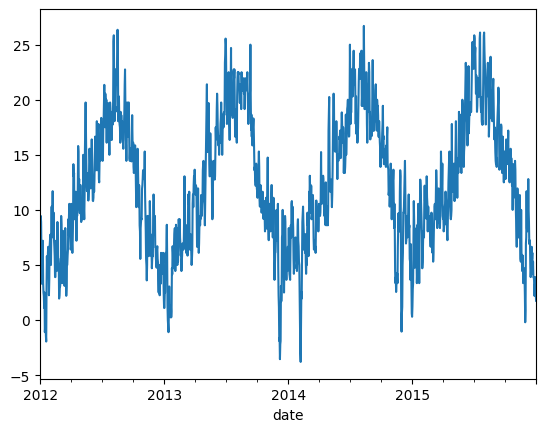

In [ ]:
df['AvgTemp'].plot()


In [ ]:
from statsmodels.tsa.stattools import adfuller


In [ ]:
def adf_test(dataset):
    dftest=adfuller(dataset,autolag='AIC')
    print('1. ADF: ', dftest[0])
    print('2. P-value: ', dftest[1])
    print('3. Num of Lags: ',dftest[2])
    print('4. Num of Obsercations used for ADF Regression and Critical Values: ', dftest[3])
    print('5. Critical Values: ')
    for key,val in dftest[4].items():
        print('\t',key, ': ', val)

In [ ]:
adf_test(df['AvgTemp'])


1. ADF:  -2.306794965693496
2. P-value:  0.16978582450822088
3. Num of Lags:  13
4. Num of Obsercations used for ADF Regression and Critical Values:  1447
5. Critical Values: 
	 1% :  -3.4348772553489617
	 5% :  -2.8635394783531085
	 10% :  -2.5678345067434516


**figure out order of ARIMA Model**

In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 31.4 MB/s eta 0:00:00


In [ ]:
from pmdarima import auto_arima


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
stepwise_fit=auto_arima(df['AvgTemp'], suppress_warnings=True)
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1461
Model:               SARIMAX(2, 1, 1)   Log Likelihood               -2949.895
Date:                Sat, 22 Jul 2023   AIC                           5907.790
Time:                        17:36:42   BIC                           5928.934
Sample:                    01-01-2012   HQIC                          5915.678
                         - 12-31-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8053      0.032     25.227      0.000       0.743       0.868
ar.L2         -0.1865      0.027     -7.033      0.000      -0.239      -0.135
ma.L1         -0.8713      0.023    -37.906      0.000      -0.916      -0.826
sigma2         3.3293      0.116     28.737      0.000       3.102       3.556
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 5.71
Prob(Q):                              0.85   Prob(JB):                         0.06
Heteroskedasticity (H):               1.07   Skew:                             0.04
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.arima_model import ARIMA


**Train and test Split**

In [ ]:
print(df.shape)
train=df.iloc[:-30]
test=df.iloc[-30:]
print(train.shape,test.shape)
print(test.iloc[0],test.iloc[-1])

(1461, 6)
(1431, 6) (30, 6)
precipitation     2.5
temp_max         10.6
temp_min          4.4
wind              5.0
weather          rain
AvgTemp           7.5
Name: 2015-12-02 00:00:00, dtype: object precipitation     0.0
temp_max          5.6
temp_min         -2.1
wind              3.5
weather           sun
AvgTemp          1.75
Name: 2015-12-31 00:00:00, dtype: object


**Model Training**

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

In [ ]:
model=sm.tsa.arima.ARIMA(train['AvgTemp'],order=(1,0,5))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1431
Model:                 ARIMA(1, 0, 5)   Log Likelihood               -2891.118
Date:                Sat, 22 Jul 2023   AIC                           5798.237
Time:                        17:36:59   BIC                           5840.366
Sample:                    01-01-2012   HQIC                          5813.968
                         - 12-01-2015                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.3810      2.553      4.458      0.000       6.377      16.385
ar.L1          0.9932      0.004    281.968      0.000       0.986       1.000
ma.L1         -0.0649      0.025     -2.566      0.010      -0.114      -0.015
ma.L2         -0.2266      0.028     -8.142      0.000      -0.281      -0.172
ma.L3         -0.1943      0.027     -7.187      0.000      -0.247      -0.141
ma.L4         -0.1277      0.027     -4.751      0.000      -0.180      -0.075
ma.L5         -0.0277      0.027     -1.043      0.297      -0.080       0.024
sigma2         3.3230      0.118     28.188      0.000       3.092       3.554
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.91
Prob(Q):                              0.95   Prob(JB):                         0.14
Heteroskedasticity (H):               1.07   Skew:                             0.02
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Make Prediction on Test Data**

<Axes: xlabel='date'>

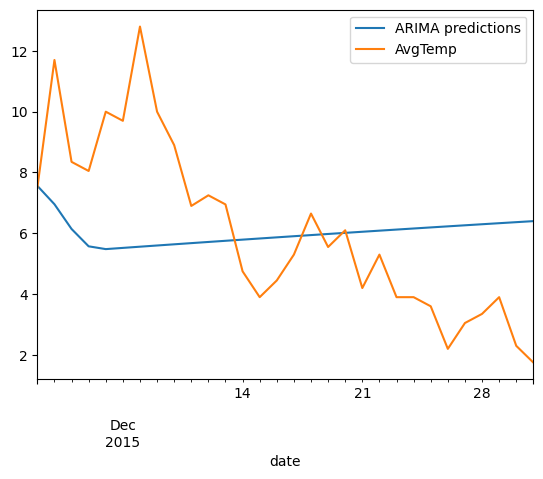

In [ ]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,type='levels').rename('ARIMA predictions')
pred.plot(legend=True)
test['AvgTemp'].plot(legend=True)

In [ ]:
test['AvgTemp'].mean()


6.075

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['AvgTemp']))
rmse

2.984093853162039

In [ ]:
model2=sm.tsa.arima.ARIMA(df['AvgTemp'],order=(1,0,5))
model2=model2.fit()
df.tail()

,precipitation,temp_max,temp_min,wind,weather,AvgTemp
date,,,,,,
2015-12-27,8.6,4.4,1.7,2.9,rain,3.05
2015-12-28,1.5,5.0,1.7,1.3,rain,3.35
2015-12-29,0.0,7.2,0.6,2.6,fog,3.90
2015-12-30,0.0,5.6,-1.0,3.4,sun,2.30
2015-12-31,0.0,5.6,-2.1,3.5,sun,1.75


**For Future Dates**

In [ ]:
index_future_dates=pd.date_range(start='2023-6-22',end='2023-7-22')
pred=model2.predict(start=len(df),end=len(df)+30,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates
print(pred)

2023-06-22    2.355671
2023-06-23    2.998943
2023-06-24    3.483941
2023-06-25    3.696200
2023-06-26    3.764743
2023-06-27    3.811563
2023-06-28    3.858086
2023-06-29    3.904313
2023-06-30    3.950247
2023-07-01    3.995889
2023-07-02    4.041241
2023-07-03    4.086306
2023-07-04    4.131084
2023-07-05    4.175578
2023-07-06    4.219790
2023-07-07    4.263721
2023-07-08    4.307373
2023-07-09    4.350748
2023-07-10    4.393848
2023-07-11    4.436674
2023-07-12    4.479228
2023-07-13    4.521512
2023-07-14    4.563527
2023-07-15    4.605276
2023-07-16    4.646760
2023-07-17    4.687980
2023-07-18    4.728939
2023-07-19    4.769638
2023-07-20    4.810078
2023-07-21    4.850261
2023-07-22    4.890190
Freq: D, Name: ARIMA Predictions, dtype: float64


<Axes: >

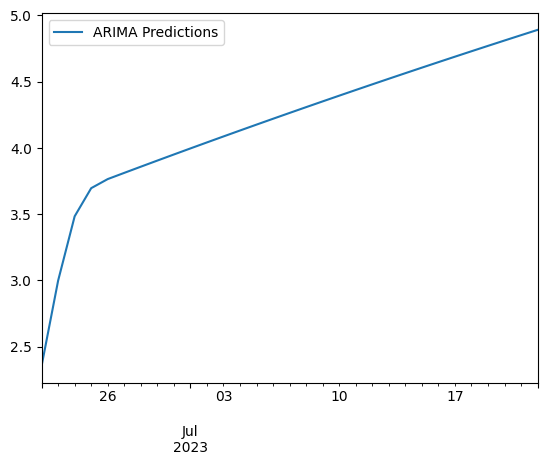

In [ ]:
pred.plot(legend=True)
